In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# קריאת הנתונים
df_kiwi = pd.read_csv("flight_data_kiwi_allsnaps_clean.csv")

In [5]:
# ניקוי עמודת המחיר מהסימן "₪"
df_kiwi['Price'] = df_kiwi['Price'].replace({'₪': '', ',': ''}, regex=True)

# מסננים שורות שבהן יש ערכים שאינם מספריים (למשל שמות שדות תעופה או תווים אחרים)
df_kiwi_clean = df_kiwi[pd.to_numeric(df_kiwi['Price'], errors='coerce').notna()]
df_kiwi_clean['Price'] = df_kiwi_clean['Price'].astype(float)


In [7]:
# שלב 3: המרת זמני טיסה לדקות
# ייתכן שהעמודות של זמני הטיסה יקראו בצורה שונה בקובץ החדש.
# ודא שאתה משנה את שמות העמודות (Dep Duration / Back Duration) בהתאם למבנה האמיתי של הקובץ.
def time_to_minutes(time_str):
    """
    ממיר מחרוזת של זמן טיסה כגון '3h 25m' למספר דקות (205).
    """
    try:
        # כאן נניח שהמבנה הוא '3h 25m'. 
        # אם המבנה שונה, יש להתאים את שלבי הפיצול.
        hours, minutes = time_str.lower().replace(' ', '').split('h')
        hours = int(hours)
        # מסירים את האות 'm' אם היא עדיין שם
        minutes = int(minutes.replace('m', '')) if 'm' in minutes else int(minutes)
        return hours * 60 + minutes
    except:
        # אם הפורמט לא מתאים, נחזיר None
        return None
    
    # למשל, אם השדות בקובץ נקראים 'Dep Duration' ו-'Back Duration':
df_kiwi_clean['Dep Duration'] = df_kiwi_clean['Dep Duration'].apply(lambda x: time_to_minutes(str(x)))
df_kiwi_clean['Back Duration'] = df_kiwi_clean['Back Duration'].apply(lambda x: time_to_minutes(str(x)))


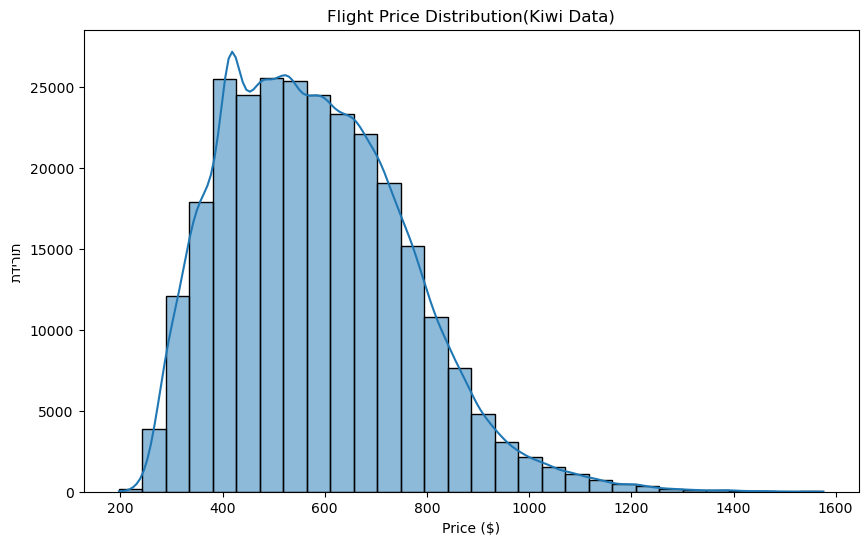

In [9]:
# שלב 4: גרפים של התפלגויות
# 4.1 - התפלגות מחירי הטיסות
plt.figure(figsize=(10,6))
sns.histplot(df_kiwi_clean['Price'], kde=True, bins=30)
plt.title('Flight Price Distribution(Kiwi Data)')
plt.xlabel('Price ($)')
plt.ylabel('תדירות')
plt.show()

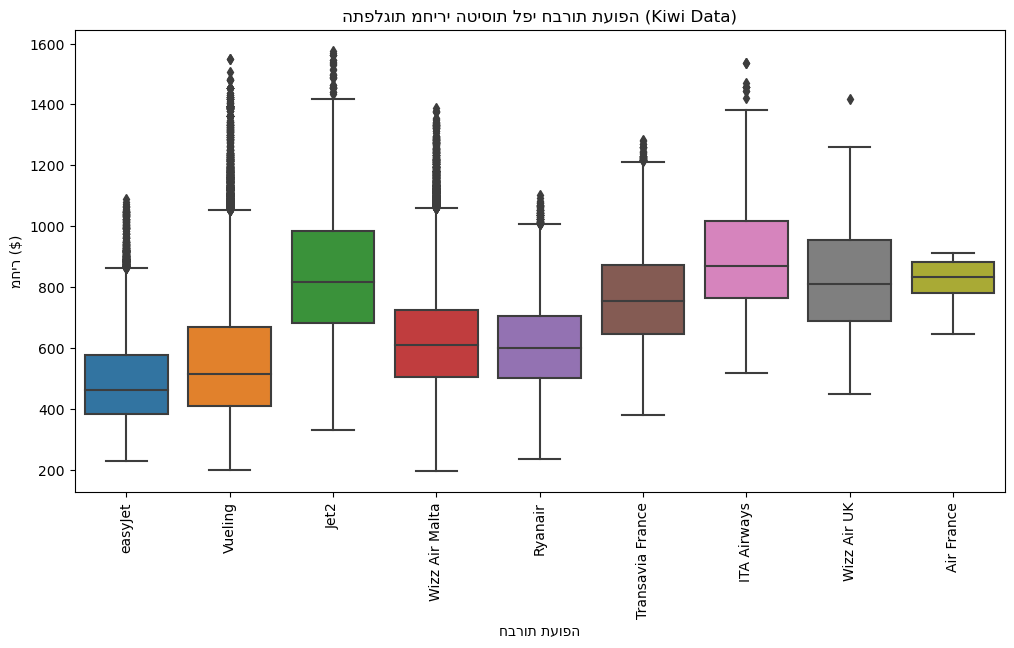

In [12]:
# 4.2 - התפלגות מחירי הטיסות לפי חברות תעופה
# נניח שהעמודה של חברת התעופה נקראת 'Airline' או משהו דומה.
# אם בקובץ החדש העמודה נקראת אחרת, התאם אותה כאן.
plt.figure(figsize=(12,6))
sns.boxplot(x='Back Company', y='Price', data=df_kiwi_clean)  # דוגמה אם העמודה דומה לנתונים הקודמים
plt.title('התפלגות מחירי הטיסות לפי חברות תעופה (Kiwi Data)')
plt.xlabel('חברות תעופה')
plt.ylabel('מחיר ($)')
plt.xticks(rotation=90)
plt.show()


In [13]:
# 4.3 - התפלגות מחירי הטיסות לפי יעדים
# נניח שהעמודה של שדה התעופה יעד נקראת 'Back Airport' גם כאן.
plt.figure(figsize=(12,6))
sns.boxplot(x='Back Airport', y='Price', data=df_kiwi_clean)
plt.title('התפלגות מחירי הטיסות לפי שדות תעופה (Kiwi Data)')
plt.xlabel('שדה תעופה יעד')
plt.ylabel('מחיר ($)')
plt.xticks(rotation=90)
plt.show()

ValueError: Could not interpret input 'Back Airport'

<Figure size 1200x600 with 0 Axes>

In [15]:
# זיהוי ומחיקת outliers עבור מחירי טיסות
price_outliers = detect_outliers_tukey(df, 'Price')
df = df[~df.index.isin(price_outliers.index)]

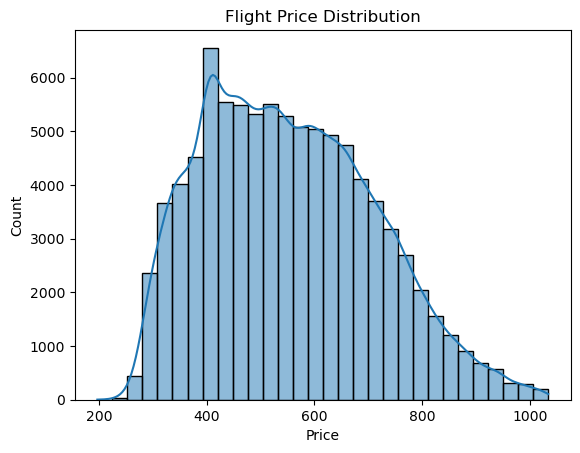

In [33]:
# ניתוח מחירים כלליים
sns.histplot(df['Price'], bins=30, kde=True)
plt.title("Flight Price Distribution")
plt.show()

In [18]:
df.columns

Index(['Snap Date', 'Dep Date', 'Return Date', 'Outbound', 'Dep Time',
       'Dep Duration', 'Dep Arrival', 'From', 'Stops', 'Landing', 'Inbound',
       'Back Time', 'Back Duration', 'Back Arrival', 'From.1', 'Stops.1',
       'Landing.1', 'Dep Company', 'Back Company', 'Price'],
      dtype='object')

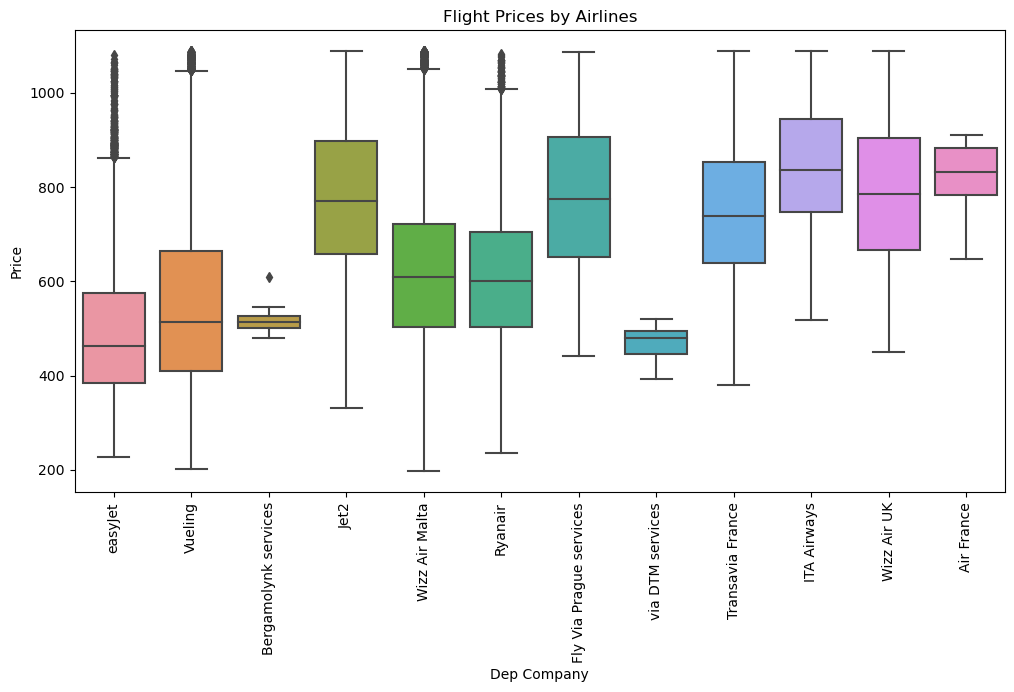

In [16]:
# מחירי טיסות לפי חברות תעופה
plt.figure(figsize=(12,6))
sns.boxplot(x='Dep Company', y='Price', data=df)
plt.xticks(rotation=90)
plt.title("Flight Prices by Airlines")
plt.show()

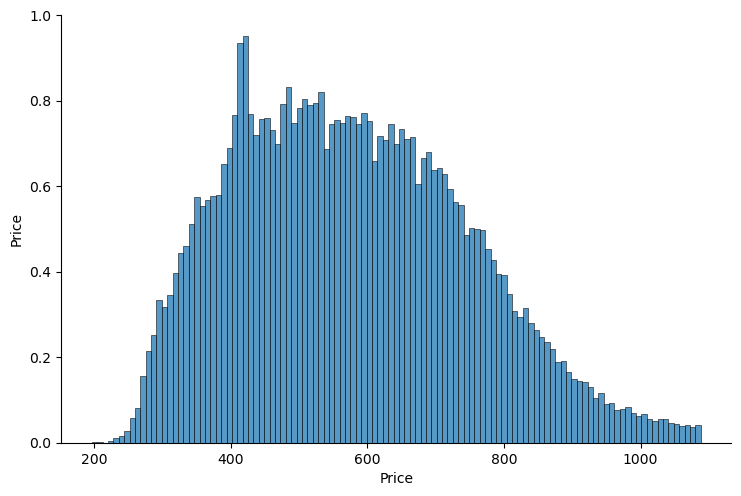

In [30]:
# חקירת תלות בין משתנים
sns.pairplot(df[['Price', 'Dep Time', 'Dep Arrival', 'Dep Duration']], height=5, aspect=1.5)  # Increase `height` and `aspect` as needed

# Show the plot
plt.show()

C:\Users\liort\AppData\Local\Temp\ipykernel_26112\2991858246.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')


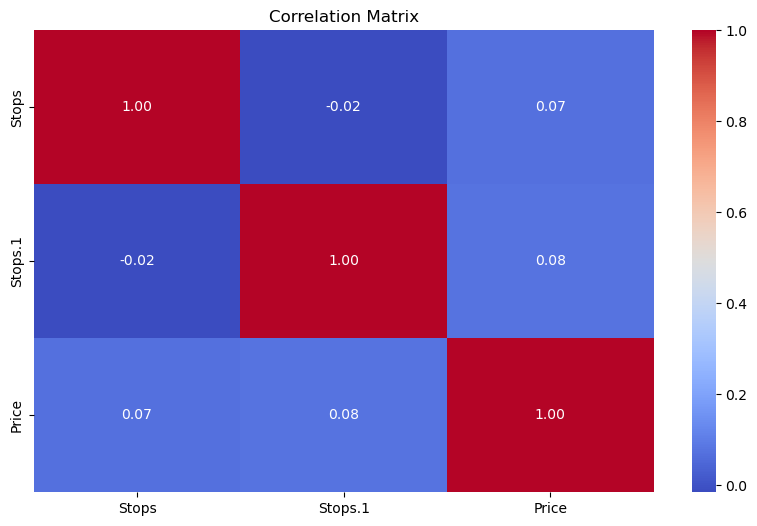

In [32]:
# מטריצת מתאמים בין משתנים מספריים
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

In [33]:
# שמירת הנתונים לאחר עיבוד
df.to_csv('cleaned_file.csv', index=False)
print(f"Cleaned data saved to cleaned_file.csv")

Cleaned data saved to cleaned_file.csv
